# Introduction

### Topic
This project combines supervised and unsupervised machine learning techniques to analyze customer behavior and enhance decision-making in the banking sector. The primary focus includes a classification task to predict whether a customer will subscribe to a term deposit and a clustering analysis to discover hidden patterns and group customers with similar characteristics. By leveraging algorithms such as Logistic Regression, Random Forest, K-Means, Hierarchical Clustering, and DBSCAN, the project seeks to optimize customer engagement strategies, improve marketing campaigns, and provide actionable insights for customer segmentation. The use of K-Means ensures more meaningful insights from customer data.

### Project Goal
The goal of this project is twofold: to develop accurate predictive models that identify customers likely to subscribe to term deposits and to explore customer behavior patterns through clustering analysis. For the supervised learning task, the objective is to design high-performing classification models that enable banks to target potential customers effectively, allocate resources efficiently, and refine marketing strategies. For the unsupervised learning task, clustering techniques such as K-Means, Hierarchical Clustering, and DBSCAN aim to uncover distinct customer segments, aiding in personalized campaign design and improving customer relationship management. Additionally, this project highlights the importance of robust data preprocessing techniques—handling missing values, addressing outliers, and balancing class distributions—to prepare the dataset for analysis. By integrating predictive modeling and clustering insights, the analysis contributes to a systematic, data-driven approach to customer targeting and segmentation, enhancing operational efficiency and customer satisfaction in the banking industry.
### Data
The dataset for this project is the UCI Bank Marketing Dataset, sourced from the UCI Machine Learning Repository. The dataset provides insights into customer demographics, transaction history, and responses to direct marketing campaigns, making it suitable for clustering and segmentation analysis. Below is a detailed description of the dataset:

### Data Source and Citation
Source: UCI Machine Learning Repository
Dataset Name: Bank Marketing Dataset


Citation: Moro, S., Cortez, P., & Rita, P. (2014). UCI Machine Learning Repository: Bank Marketing Data Set. Retrieved from https://archive.ics.uci.edu/ml/datasets/bank+marketing

Dataset Description

The dataset contains 41,188 rows and 21 features, including numeric and categorical data. The features are categorized as follows:

Customer Demographics:

- Age (numeric)
- Job (categorical)
- Marital (categorical)
- Education (categorical)
- Default (categorical)
- Housing (categorical)
- Loan (categorical)

Campaign Data:

- Contact type (categorical)
- Last contact day and month (numeric, categorical)
- Duration of last contact (numeric)
- Number of contacts during this campaign (numeric)
- Outcome of previous campaigns (categorical)

Financial Information:

- Balance (numeric)

The dataset combines transactional data with demographic and campaign interaction data, enabling a comprehensive analysis of customer profiles. The total file size is approximately 4MB, making it manageable for exploratory analysis and clustering.

In [2]:
# Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Machine Learning: Model Building and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Exploratory Data Analysis

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Summary Statistics:
                age        balance           day      durat

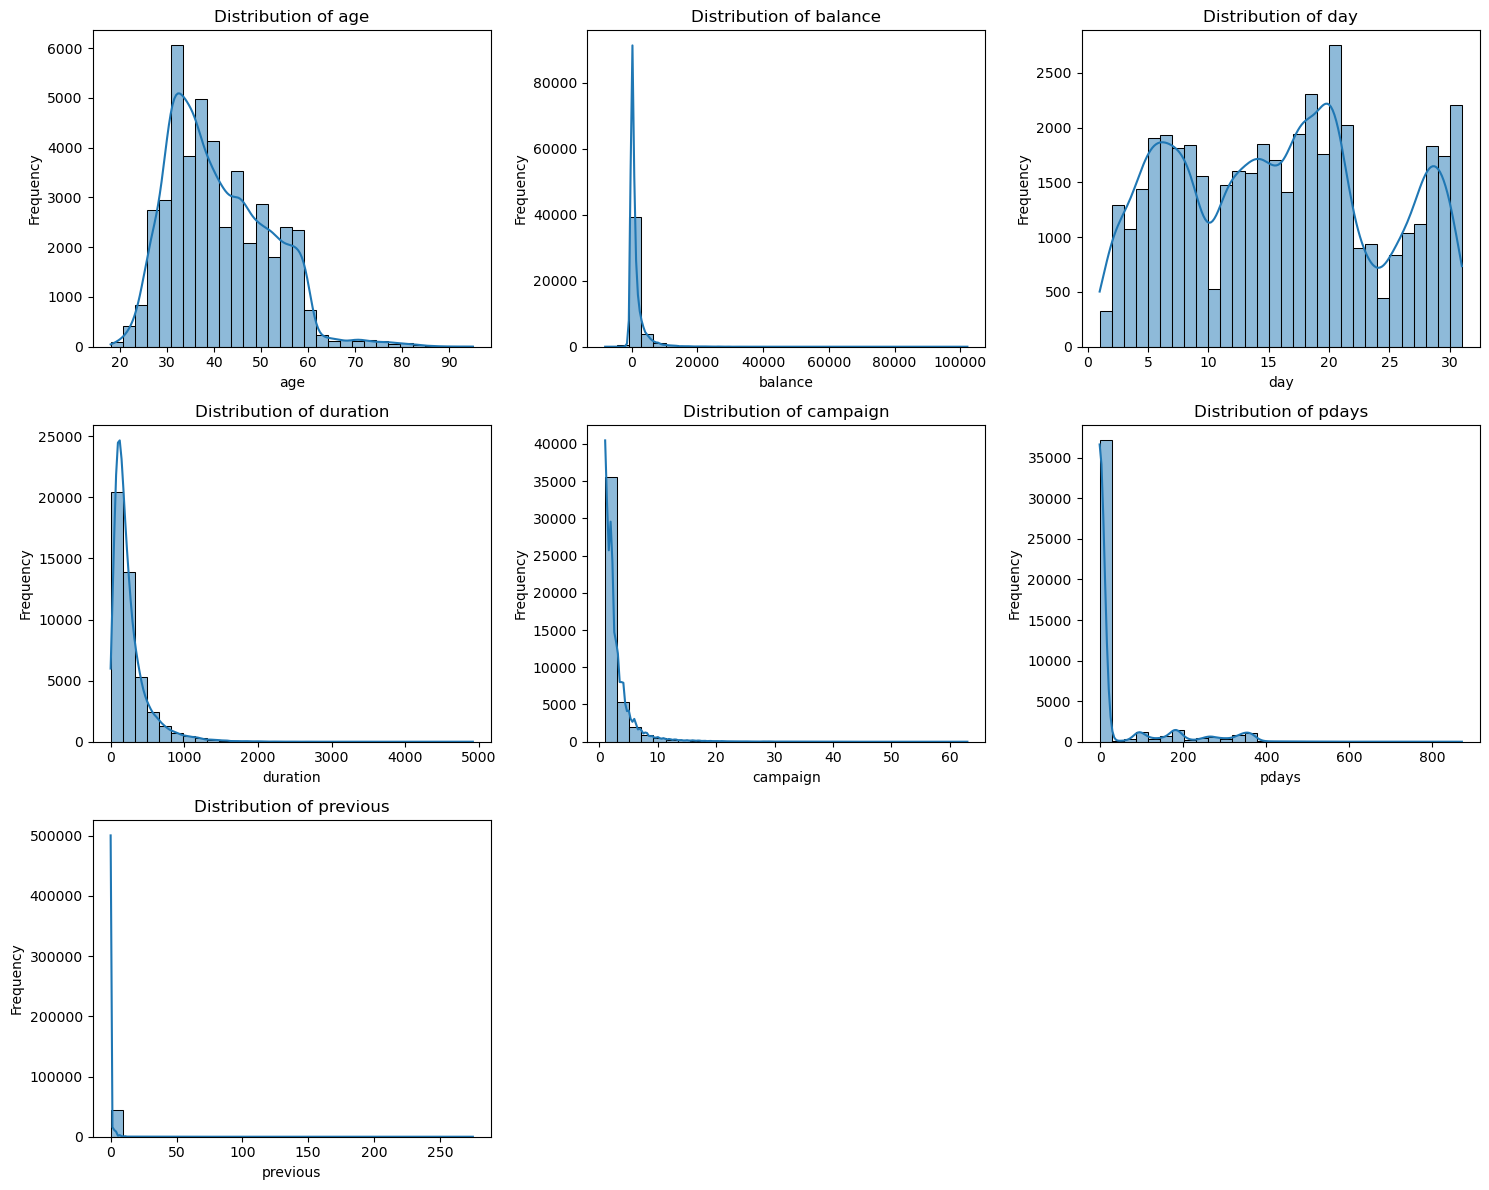

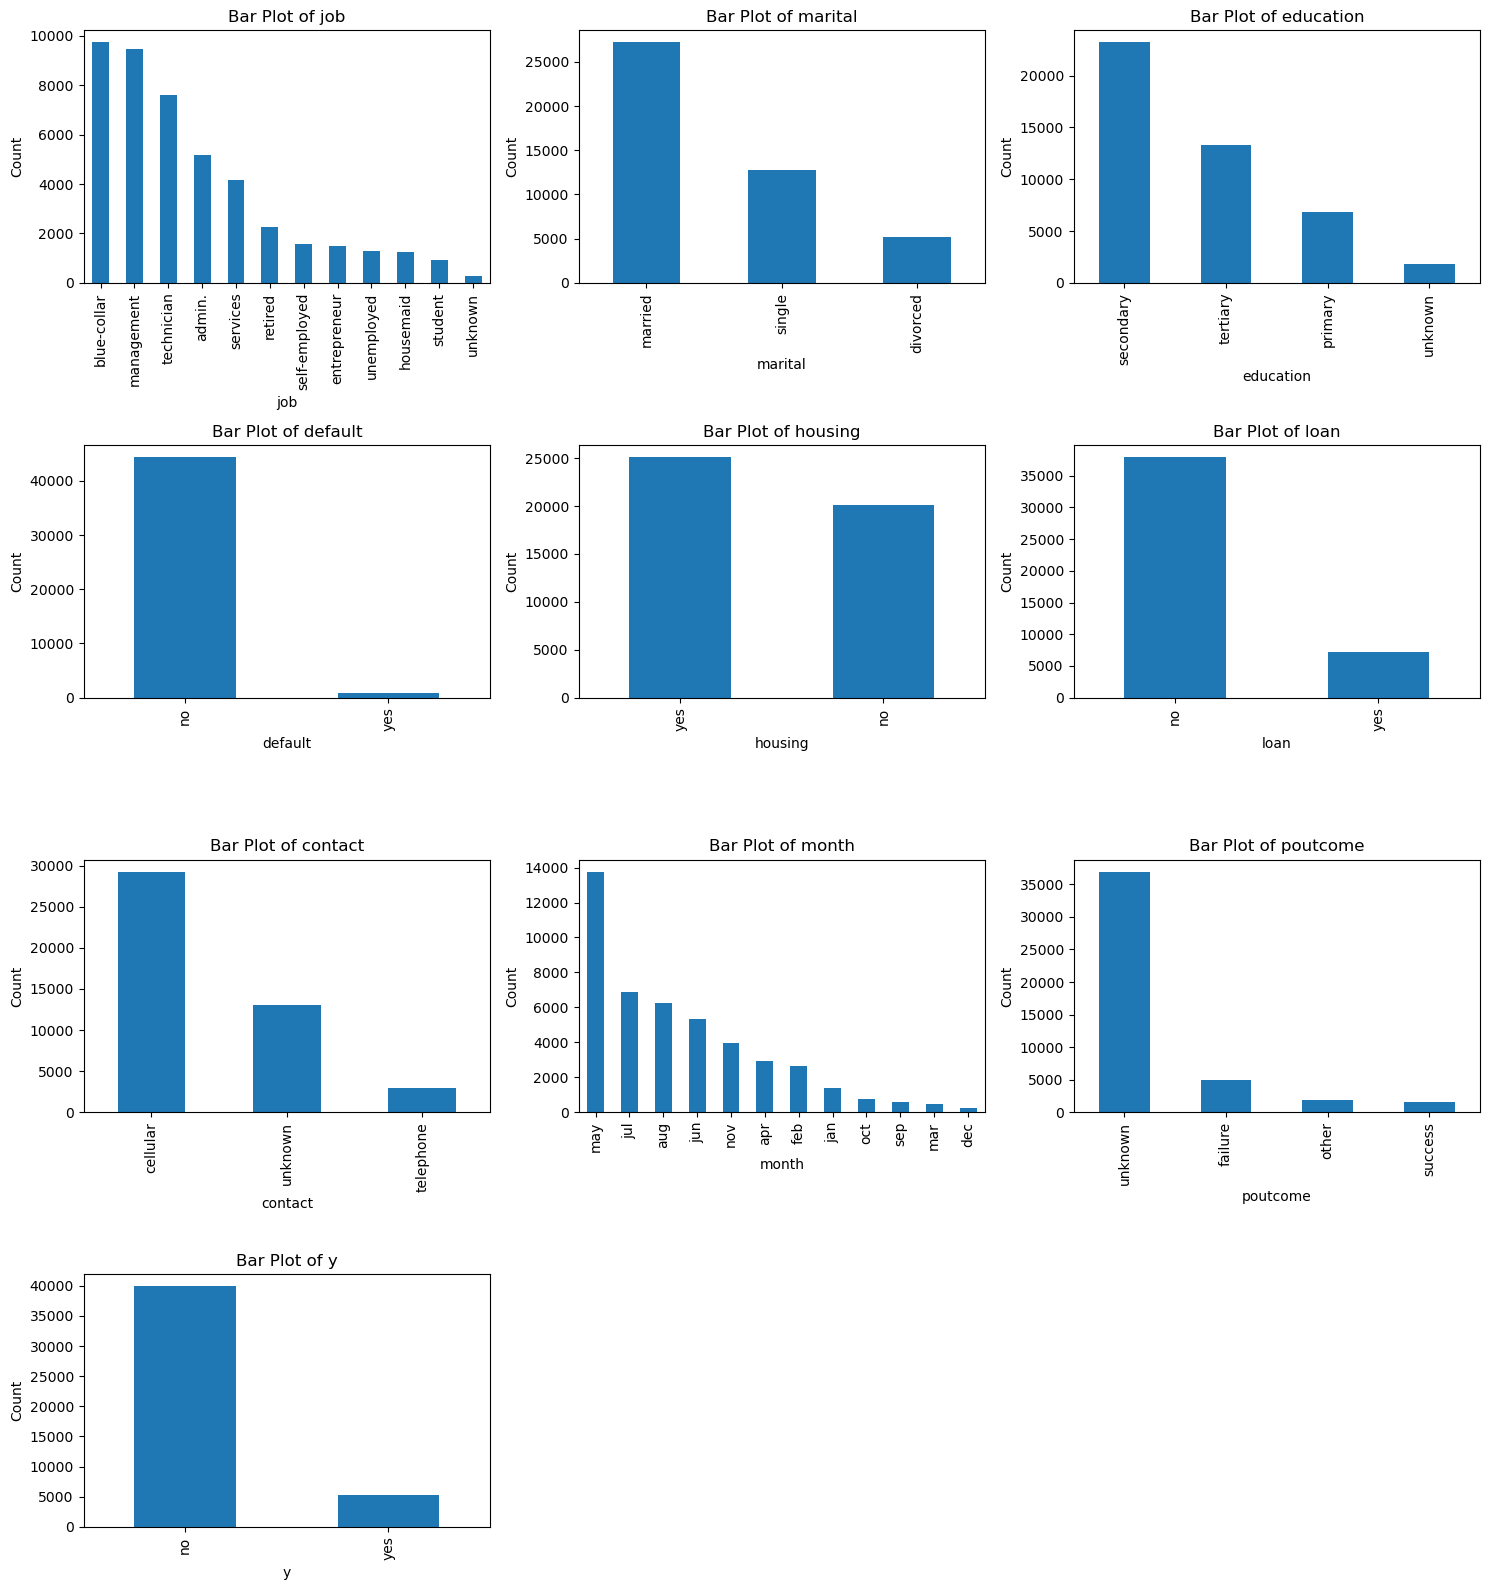

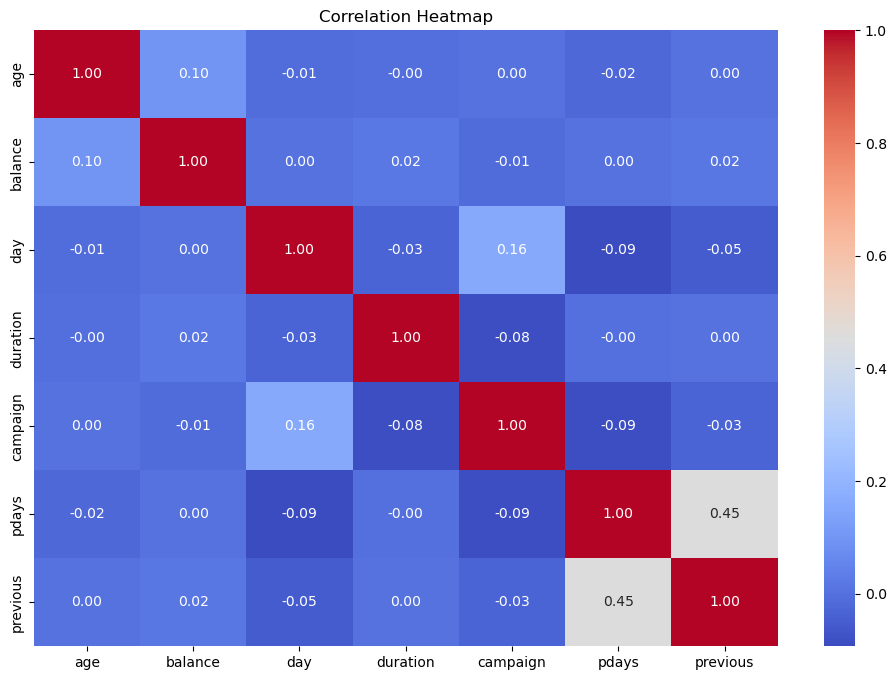

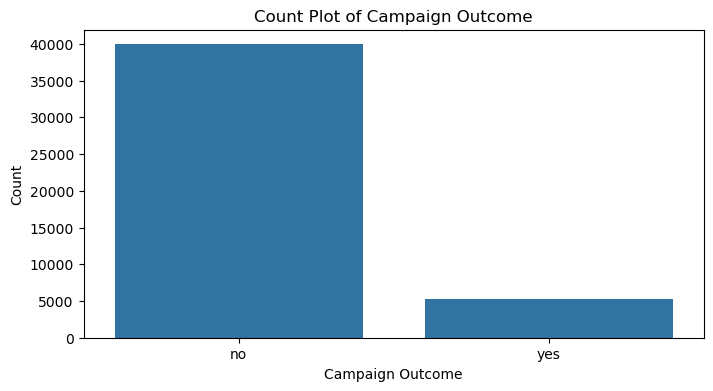

In [3]:
# Load the dataset
data_path = r"C:\Users\Corem\OneDrive\Desktop\bank-full.csv"
data = pd.read_csv(data_path, sep=';')

# Dataset Info
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Plot distributions of numeric features 
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_columns)
rows = (num_cols + 2) // 3  
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Bar plots for categorical variables 
categorical_columns = data.select_dtypes(include=['object']).columns
cat_cols = len(categorical_columns)
rows = (cat_cols + 2) // 3  
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()
for i, column in enumerate(categorical_columns):
    data[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Bar Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Correlation heatmap 
if not numeric_columns.empty:
    plt.figure(figsize=(12, 8))
    correlation_matrix = data[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns found for correlation heatmap.")

# Countplot for campaign outcomes
if 'y' in data.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x='y')
    plt.title("Count Plot of Campaign Outcome")
    plt.xlabel("Campaign Outcome")
    plt.ylabel("Count")
    plt.show()


In [4]:
# Count "unknown" values in each column
unknown_counts = data.isin(['unknown']).sum()
unknown_proportions = unknown_counts / len(data)

print("Unknown Value Counts:")
print(unknown_counts)
print("\nProportion of Unknown Values:")
print(unknown_proportions)


Unknown Value Counts:
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

Proportion of Unknown Values:
age          0.000000
job          0.006370
marital      0.000000
education    0.041074
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.287983
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.817478
y            0.000000
dtype: float64


## Exploratory Data Analysis Summary

Dataset Overview

- The dataset contains 45,211 rows and 17 columns.
- Features include a mix of categorical (e.g., job, marital, education) and numeric (e.g., age, balance, duration) variables.
- No missing values were identified, but some features have "unknown" as a category, which may need handling.

Key Feature Distributions

- Age: Slightly right-skewed, with most customers between 30 and 40 years old. Outliers exist above 70.
- Balance: Highly right-skewed, with most customers having balances near zero. A small subset of wealthy customers has balances exceeding 60,000 euros.
- Duration: Majority of calls lasted under 500 seconds, with some outliers exceeding 4,000 seconds.
- Campaign: Most customers were contacted 1-2 times during the campaign, but extreme cases show over 60 contacts.
- Pdays: Most customers had no previous contacts (value = 0). Higher values are sparse but correlate moderately with previous.
 

Categorical Feature Insights
- Job: Most common job types are blue-collar, management, and technician. Rare categories include student, housemaid, and unknown.
- Marital Status: Majority are married (~60%), followed by single (~30%) and divorced (~10%).
- Education: Customers are primarily educated at the secondary level, followed by tertiary and primary levels.
- Housing and Personal Loans:
- More customers have housing loans than not.
- Most customers do not have a personal loan (~85%).
- Contact: Majority of contacts were made via cellular, with a notable portion marked as unknown.
- Month: Campaigns are concentrated in May, followed by July, August, and June.
- Poutcome: Most records show poutcome as unknown (~80%), indicating many first-time contacts.

Target Variable (y)

- The majority of customers (~90%) did not subscribe to a term deposit.
- This significant class imbalance needs to be addressed during modeling.

Correlation Insights
- Features have weak correlations overall.
- pdays and previous have a moderate positive correlation (0.45), suggesting a link between previous contact history and recency.
- balance and age show a slight positive correlation (~0.1).

Outliers
- Significant outliers were observed in balance, duration, campaign, pdays, and previous. These may skew analysis or model training and require careful handling.

# Data Preprocessing

C:\Users\Corem\AppData\Local\Temp\ipykernel_39848\3339087924.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\Corem\AppData\Local\Temp\ipykernel_39848\3339087924.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], alpha=0.6, cmap='viridis')


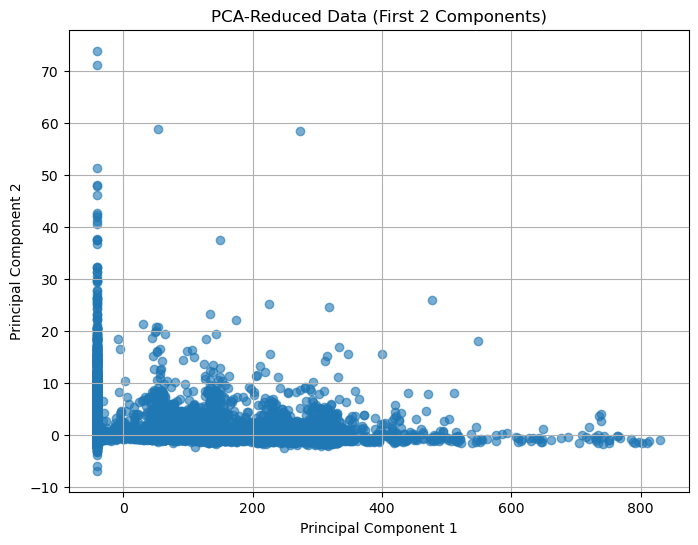


Processed Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     45211 non-null  float64
 1   PC2     45211 non-null  float64
 2   y_yes   45211 non-null  bool   
dtypes: bool(1), float64(2)
memory usage: 750.7 KB
None


In [5]:
# --- Data Cleaning --- #
categorical_cols = data.select_dtypes(include=['object']).columns

# Replace 'unknown' with NaN for imputation
for col in categorical_cols:
    data[col] = data[col].replace('unknown', pd.NA)

# Impute missing values in categorical columns with the most frequent value
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Drop the `poutcome` column 
if 'poutcome' in data.columns:
    data.drop(columns=['poutcome'], inplace=True)

# --- Encoding Categorical Variables --- #
categorical_cols = data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoded_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
else:
    encoded_data = data.copy()

# --- Normalize Numeric Features --- #
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = RobustScaler()
scaled_numeric_data = scaler.fit_transform(encoded_data[numeric_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols, index=encoded_data.index)
encoded_data[numeric_cols] = scaled_numeric_df

# --- PCA for Dimensionality Reduction --- #
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(encoded_data)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# --- Visualize PCA Components --- #
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], alpha=0.6, cmap='viridis')
plt.title("PCA-Reduced Data (First 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

# --- Combine PCA Data with Target Variable --- #
if 'y_yes' in encoded_data.columns:
    processed_data = pd.concat([X_pca_df, encoded_data['y_yes']], axis=1)
else:
    processed_data = X_pca_df.copy()

# Display final processed dataset info
print("\nProcessed Data Summary:")
print(processed_data.info())


The processed dataset consists of 45,211 entries, with features transformed into two principal components using Principal Component Analysis (PCA). The preprocessing steps were carefully designed to prepare the data for clustering and classification tasks, ensuring efficiency and interpretability.

- Handling Missing Values: Missing values, particularly "unknown" entries in categorical features, were replaced with the most frequent value for each feature. This approach maintained data consistency and ensured that no valuable data points were lost during the cleaning process.

- Encoding Categorical Variables: Categorical variables, such as job and marital status, were converted into binary-encoded formats using one-hot encoding. This transformation allowed the data to be represented in a format that is understandable by machine learning algorithms, producing additional features for analysis.

- Scaling Numeric Features: RobustScaler was applied to numeric features, including age, balance, duration, and campaign. This scaling method minimizes the impact of outliers by focusing on interquartile ranges, ensuring that extreme values do not disproportionately influence the analysis while maintaining feature comparability.

- Dimensionality Reduction with PCA: Principal Component Analysis was utilized to reduce the data's dimensionality to two components, capturing the majority of the variance while discarding redundant information. This step streamlined the dataset for clustering and enabled effective visualization of patterns in the reduced feature space.

By focusing on these preprocessing steps, the dataset is optimized for unsupervised learning tasks. The application of PCA ensures computational efficiency and enhances the potential to uncover meaningful clusters and patterns within the data. The resulting dataset is ready for exploratory analysis and clustering, providing a solid foundation for further insights.

# Modeling

The modeling phase of this project focused on evaluating a combination of supervised and unsupervised learning algorithms to address both predictive and exploratory objectives. The selected models include Logistic Regression, Random Forest, K-Means, Hierarchical Clustering, and DBSCAN. These methods were chosen to balance interpretability, computational efficiency, and the ability to uncover meaningful patterns in the data.

For supervised learning, Logistic Regression was employed as a baseline model due to its simplicity, interpretability, and computational efficiency. It provided a benchmark for comparing more advanced models. Random Forest, a tree-based ensemble model, was selected for its robustness in handling complex interactions between features and its capability to provide insights through feature importance rankings.

For unsupervised learning, K-Means was utilized to group data points into distinct clusters based on similarity. Its simplicity and scalability make it a reliable choice for exploratory analysis. Hierarchical Clustering was employed to uncover hierarchical relationships between data points, offering intuitive dendrogram visualizations for better interpretability. DBSCAN was included for its ability to detect clusters of varying densities and identify outliers, enhancing the exploratory analysis by highlighting complex patterns in the data.

Supervised models were evaluated using metrics such as accuracy, confusion matrices, and ROC curves, providing detailed insights into their classification performance. Unsupervised models were assessed using silhouette scores and visualizations of clustering results, enabling a comprehensive exploration of data structure. This diverse modeling approach provided a balanced framework for both predictive modeling and pattern discovery.

### Logistic Regression Model ###
Logistic Regression Accuracy: 0.8817
Training Time: 0.03 seconds

Confusion Matrix:
[[11959     7]
 [ 1597     1]]


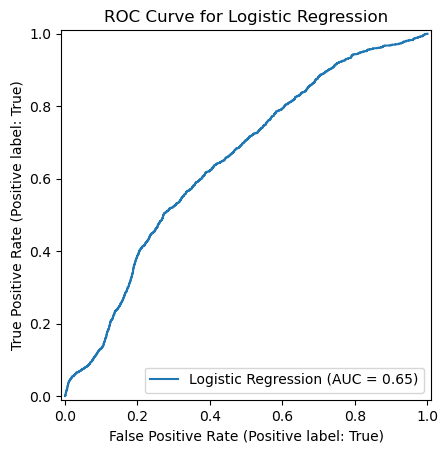

In [6]:
# Split the processed data into features and target
X_train, X_test, y_train, y_test = train_test_split(
    processed_data.drop(columns=['y_yes'], errors='ignore'),
    processed_data['y_yes'],
    test_size=0.3,
    random_state=42
)

# --- Logistic Regression Model --- #
print("### Logistic Regression Model ###")

# Initialize and train Logistic Regression
start_time = time.time()
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_time = time.time() - start_time

# Make predictions
log_reg_predictions = log_reg.predict(X_test)

# Evaluate performance
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_predictions)

# Output results
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print(f"Training Time: {log_reg_time:.2f} seconds")
print("\nConfusion Matrix:")
print(log_reg_conf_matrix)

# Plot the ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name="Logistic Regression")
plt.title("ROC Curve for Logistic Regression")
plt.show()



Random Forest Accuracy: 0.8747
Training Time: 3.76 seconds
Confusion Matrix:
[[11673   293]
 [ 1407   191]]


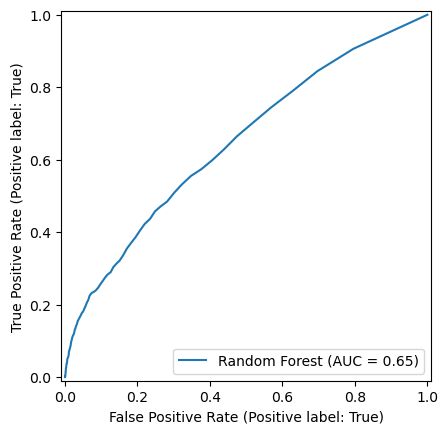

In [7]:
# --- Random Forest Model ---
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_time = time.time() - start_time

# Make predictions
rf_predictions = rf_clf.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Training Time: {rf_time:.2f} seconds")
print("Confusion Matrix:")
print(rf_conf_matrix)

# ROC Curve
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, name="Random Forest")
plt.show()


### K-Means Clustering ###
K-Means Silhouette Score: 0.9195


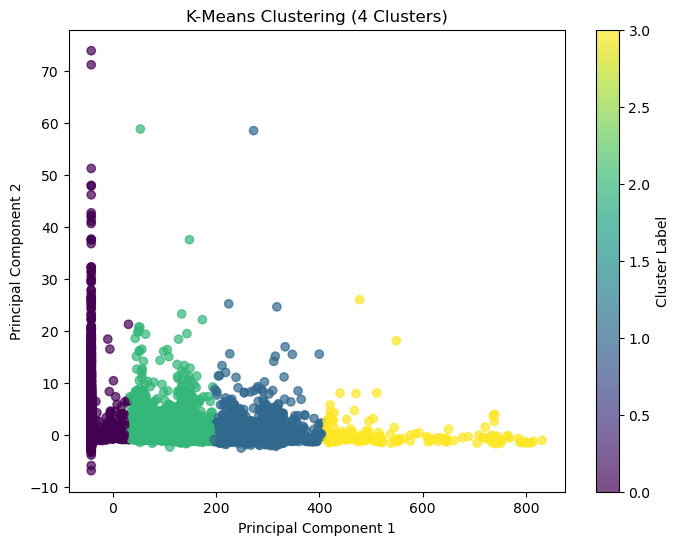

In [8]:
# --- K-Means Clustering --- #
print("### K-Means Clustering ###")

# Ensure `X_pca_df` exists and has the required PCA-transformed data
if 'X_pca_df' not in locals():
    raise ValueError("PCA-transformed data 'X_pca_df' is not defined. Ensure PCA preprocessing is completed.")

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Added n_init for stable initialization
kmeans.fit(X_pca_df)
kmeans_labels = kmeans.labels_

# Evaluate clustering performance
try:
    kmeans_silhouette = silhouette_score(X_pca_df, kmeans_labels)
    print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
except ValueError as e:
    kmeans_silhouette = None
    print(f"Silhouette Score could not be calculated: {e}")

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df.iloc[:, 0], X_pca_df.iloc[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering (4 Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()



### Hierarchical Clustering ###


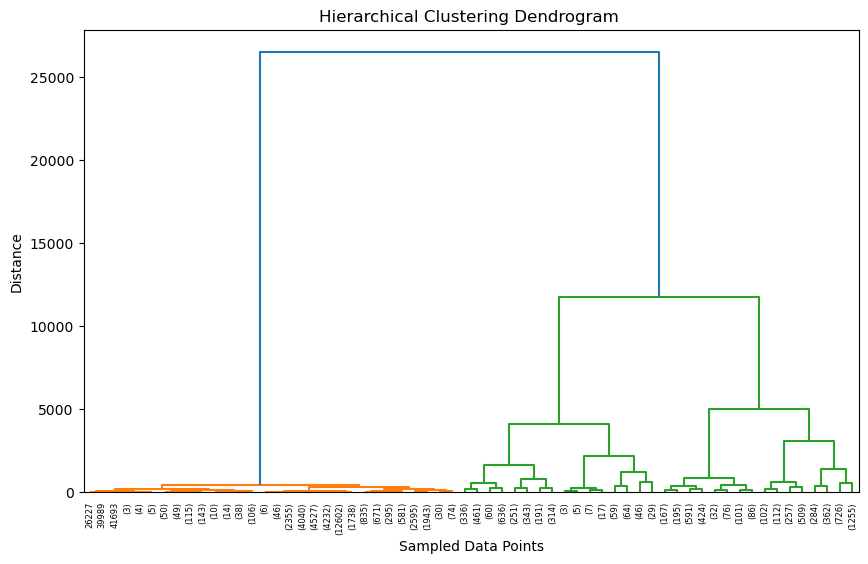

Hierarchical Clustering Silhouette Score: 0.9074


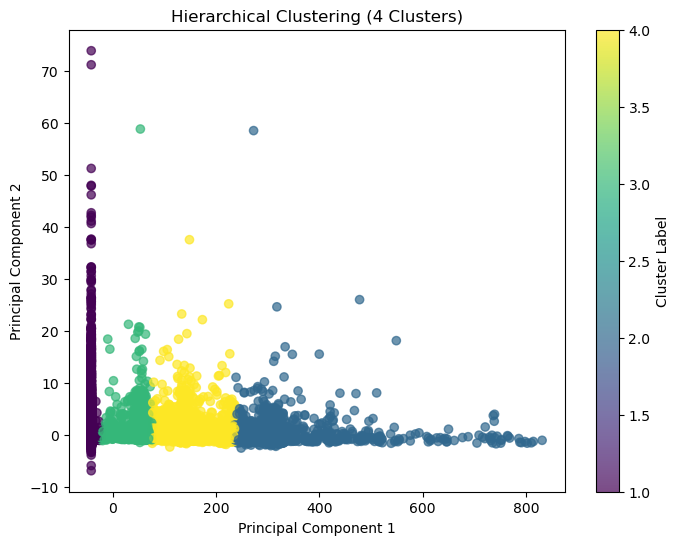

In [10]:
# --- Hierarchical Clustering --- #
print("### Hierarchical Clustering ###")

# Compute linkage matrix using Ward's method
linkage_matrix = linkage(X_pca_df, method='ward')

# Plot Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram ")
plt.xlabel("Sampled Data Points")
plt.ylabel("Distance")
plt.show()

# Assign clusters based on dendrogram
hc_clusters = fcluster(linkage_matrix, 4, criterion='maxclust')

# Evaluate clustering performance
hc_silhouette = silhouette_score(X_pca_df, hc_clusters)
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette:.4f}")

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=hc_clusters, cmap='viridis', alpha=0.7)
plt.title("Hierarchical Clustering (4 Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


### DBSCAN Clustering ###
DBSCAN Silhouette Score (Excluding Noise): 0.4698


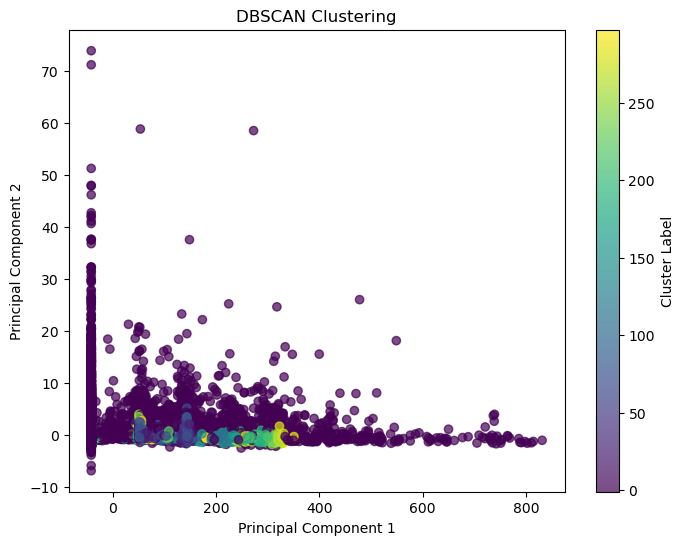

In [ ]:
# --- DBSCAN Clustering --- #
print("### DBSCAN Clustering ###")

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca_df)

# Evaluate clustering performance
# Filter out noise points (-1) for silhouette score
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    valid_labels = dbscan_labels[dbscan_labels != -1]
    valid_points = X_pca_df[dbscan_labels != -1]
    dbscan_silhouette = silhouette_score(valid_points, valid_labels)
    print(f"DBSCAN Silhouette Score (Excluding Noise): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or all noise points.")

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


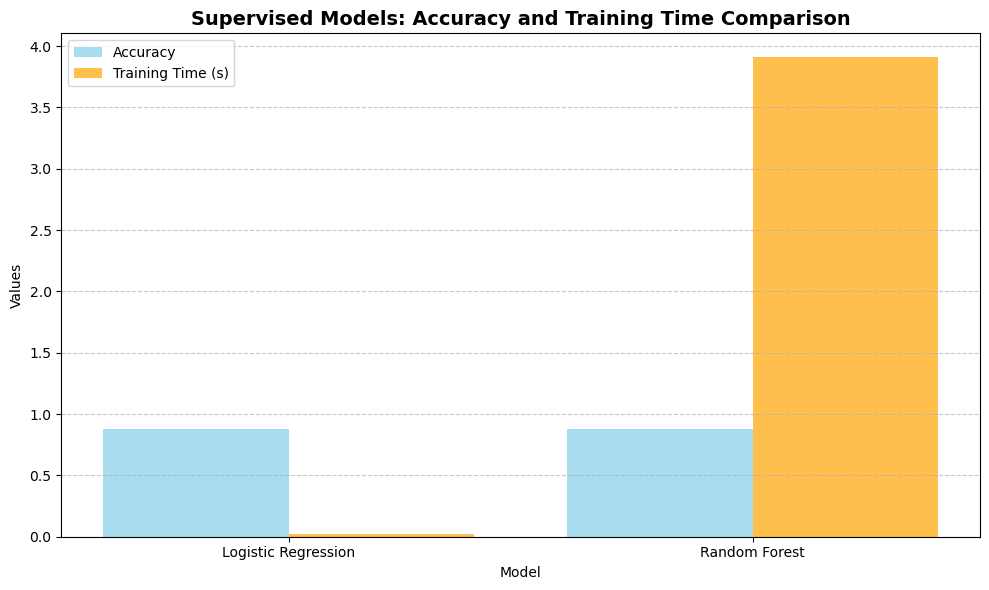

C:\Users\Corem\AppData\Local\Temp\ipykernel_10880\2219521960.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Silhouette Score", y="Model", data=unsupervised_df, palette="coolwarm")


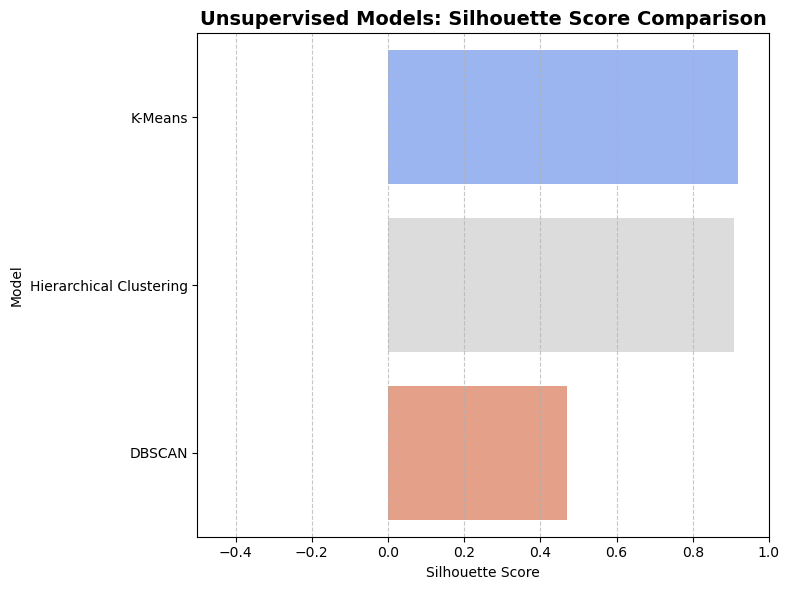

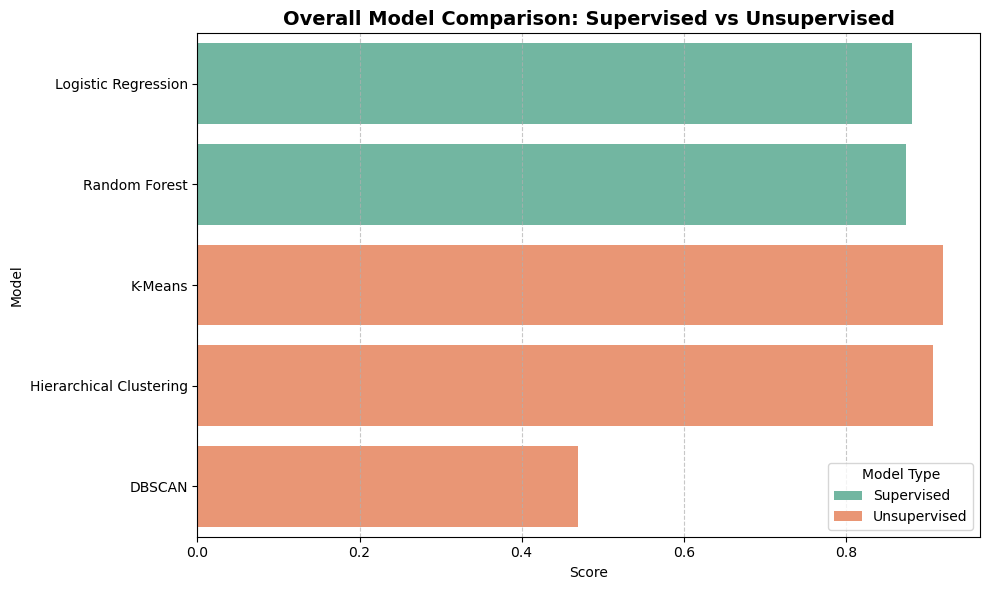

In [ ]:


# --- Store Results for Unsupervised Models --- #
unsupervised_results = [
    {"Model": "K-Means", "Silhouette Score": kmeans_silhouette},
    {"Model": "Hierarchical Clustering", "Silhouette Score": hc_silhouette},
    {"Model": "DBSCAN", "Silhouette Score": dbscan_silhouette},
]
unsupervised_df = pd.DataFrame(unsupervised_results)

# --- Store Results for Supervised Models --- #
supervised_results = [
    {"Model": "Logistic Regression", "Accuracy": log_reg_accuracy, "Training Time (s)": log_reg_time},
    {"Model": "Random Forest", "Accuracy": rf_accuracy, "Training Time (s)": rf_time},
]
supervised_df = pd.DataFrame(supervised_results)

# --- Combined Results --- #
combined_results = [
    {"Model": "Logistic Regression", "Score": log_reg_accuracy, "Type": "Supervised"},
    {"Model": "Random Forest", "Score": rf_accuracy, "Type": "Supervised"},
    {"Model": "K-Means", "Score": kmeans_silhouette, "Type": "Unsupervised"},
    {"Model": "Hierarchical Clustering", "Score": hc_silhouette, "Type": "Unsupervised"},
    {"Model": "DBSCAN", "Score": dbscan_silhouette, "Type": "Unsupervised"},
]
combined_df = pd.DataFrame(combined_results)

# --- Combined Training Time and Accuracy Plot --- #
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4

# Create indices for grouped bars
bar_positions = range(len(supervised_df))

# Plot Accuracy
ax.bar(bar_positions, supervised_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue', alpha=0.7)

# Plot Training Time next to Accuracy
ax.bar([pos + bar_width for pos in bar_positions], supervised_df["Training Time (s)"], 
       width=bar_width, label="Training Time (s)", color='orange', alpha=0.7)

# Set labels and titles
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(supervised_df["Model"])
ax.set_title("Supervised Models: Accuracy and Training Time Comparison", fontsize=14, weight="bold")
ax.set_ylabel("Values")
ax.set_xlabel("Model")
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Unsupervised Silhouette Score Comparison --- #
plt.figure(figsize=(8, 6))
sns.barplot(x="Silhouette Score", y="Model", data=unsupervised_df, palette="coolwarm")
plt.title("Unsupervised Models: Silhouette Score Comparison", fontsize=14, weight="bold")
plt.xlabel("Silhouette Score")
plt.ylabel("Model")
plt.xlim(-0.5, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Combined Score Comparison --- #
plt.figure(figsize=(10, 6))
sns.barplot(x="Score", y="Model", hue="Type", data=combined_df, palette="Set2")
plt.title("Overall Model Comparison: Supervised vs Unsupervised", fontsize=14, weight="bold")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(title="Model Type")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Results

C:\Users\Corem\AppData\Local\Temp\ipykernel_39848\3349676981.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Cluster', y=feature, data= data, palette="coolwarm", ci="sd")
C:\Users\Corem\AppData\Local\Temp\ipykernel_39848\3349676981.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y=feature, data= data, palette="coolwarm", ci="sd")
C:\Users\Corem\AppData\Local\Temp\ipykernel_39848\3349676981.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Cluster', y=feature, data= data, palette="coolwarm", ci="sd")
C:\Users\Corem\AppData\Local\Temp\ipykernel_39848\3349676981.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

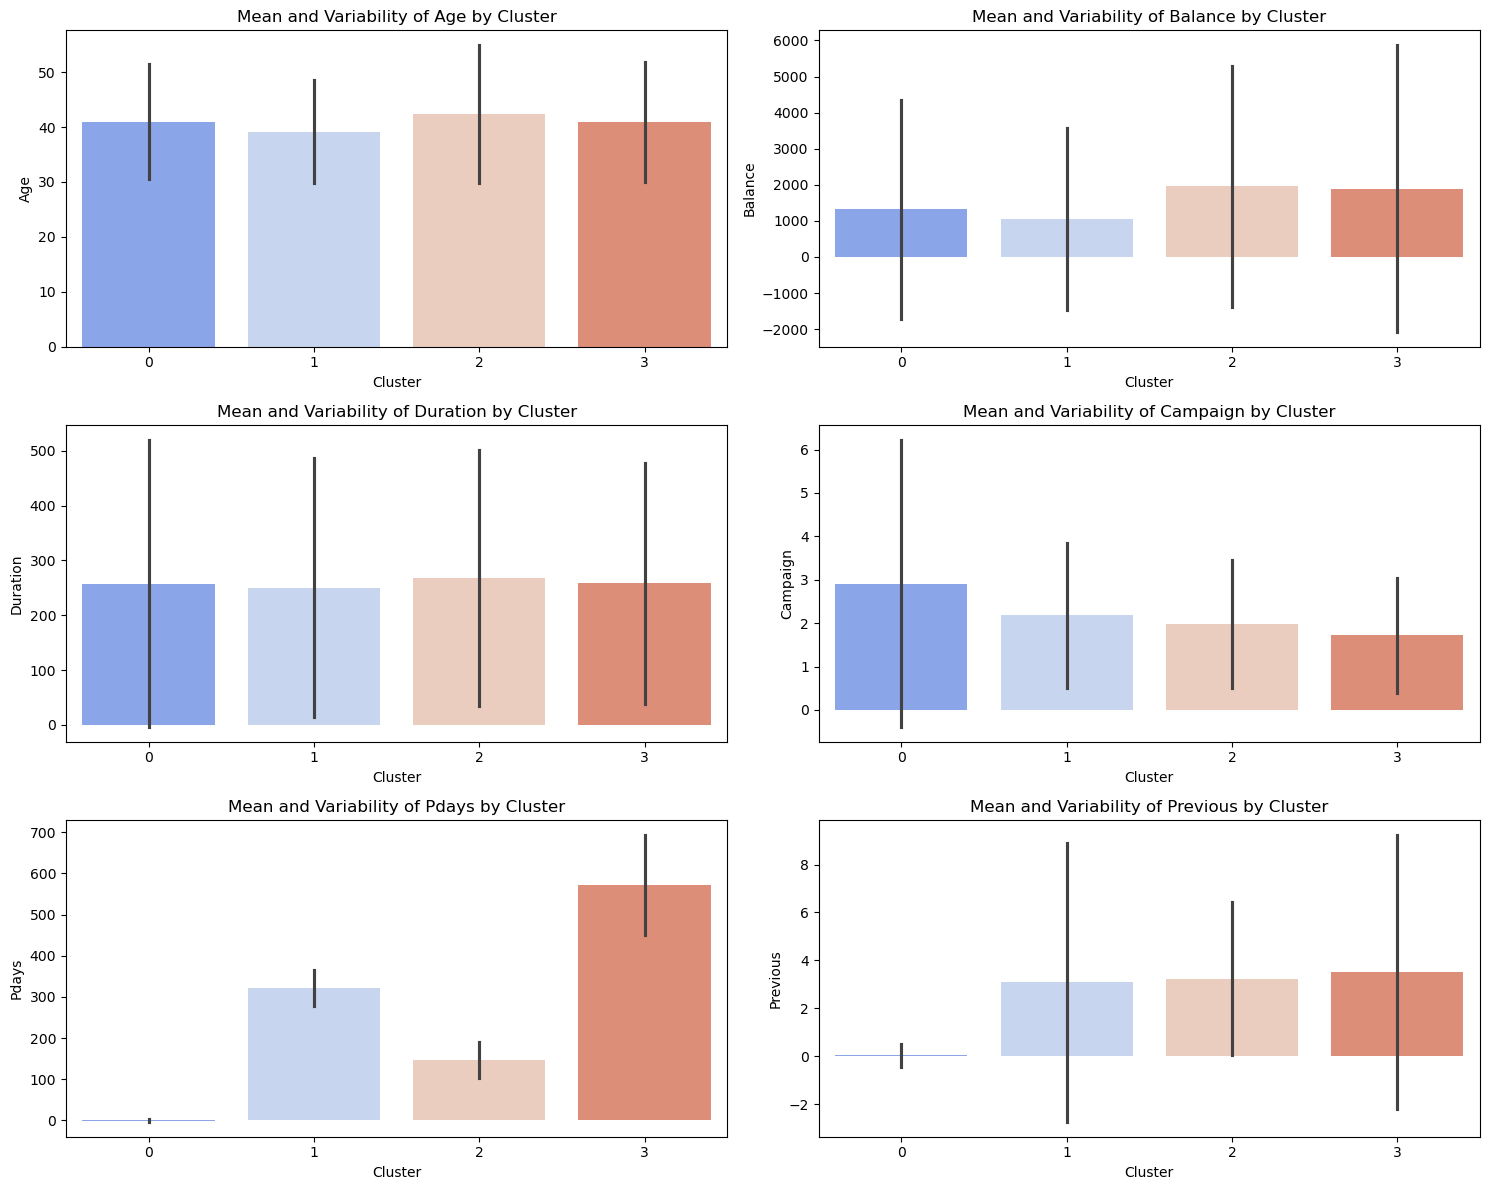

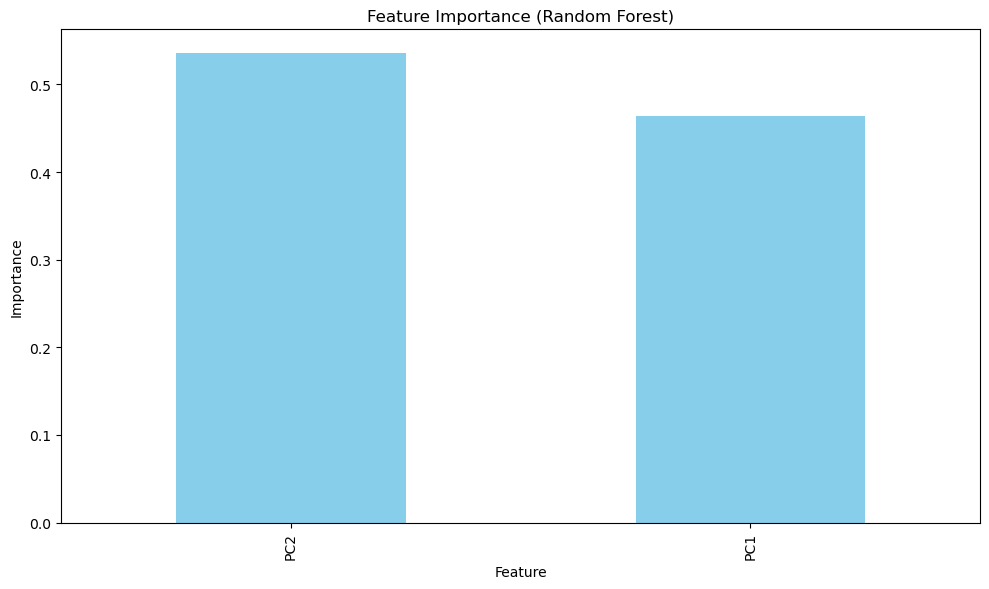

PCA Components Shape: (2, 37)
Original Features Shape: 37


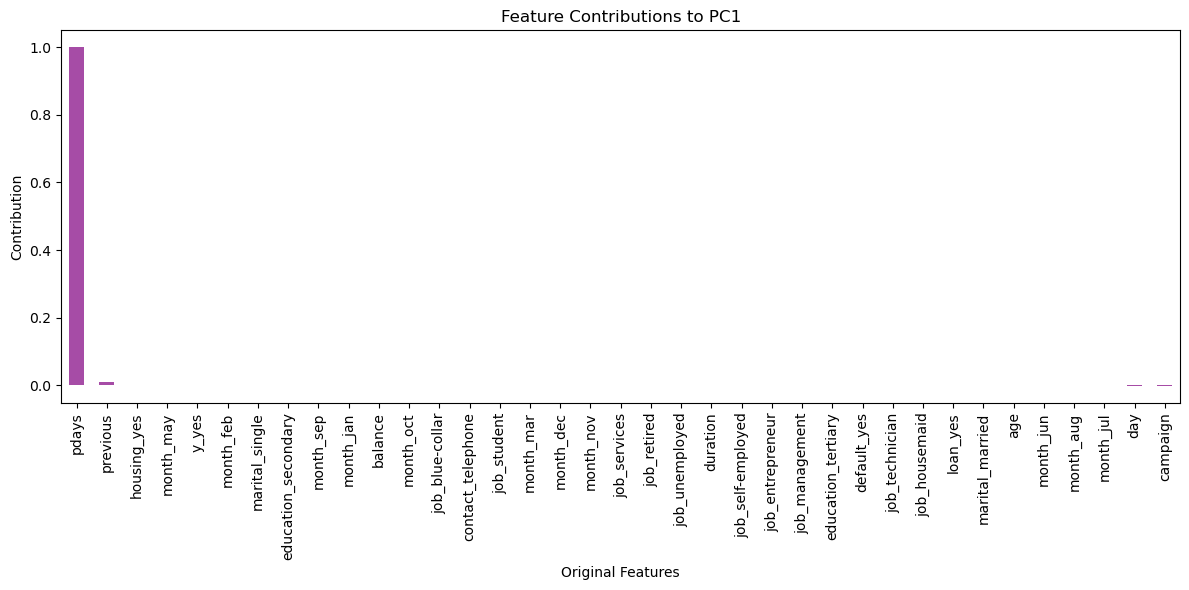

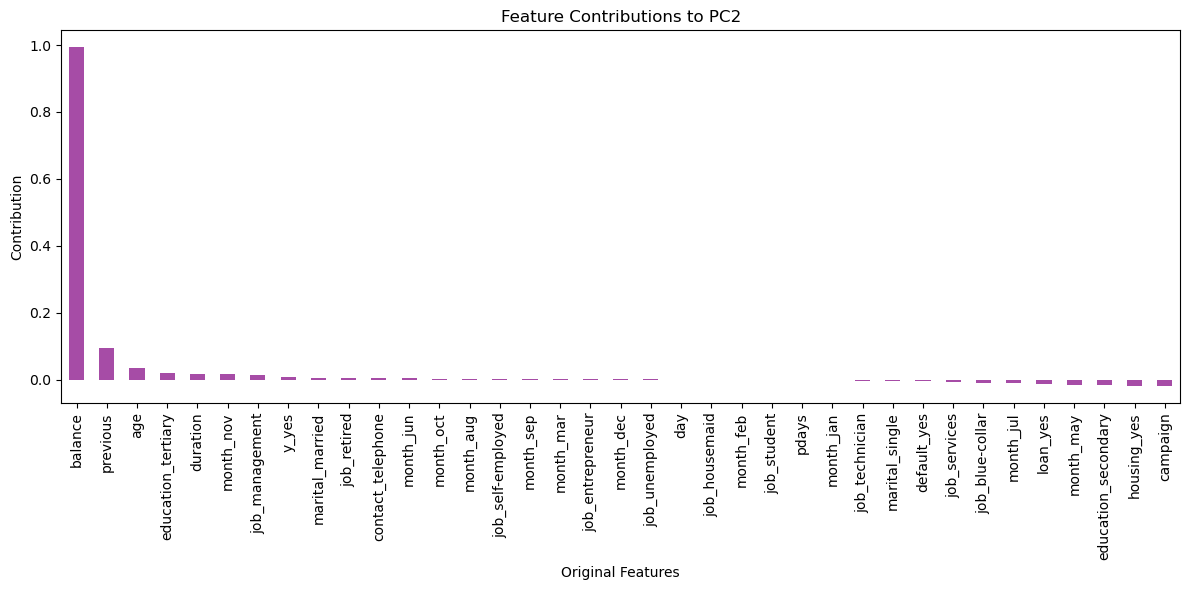

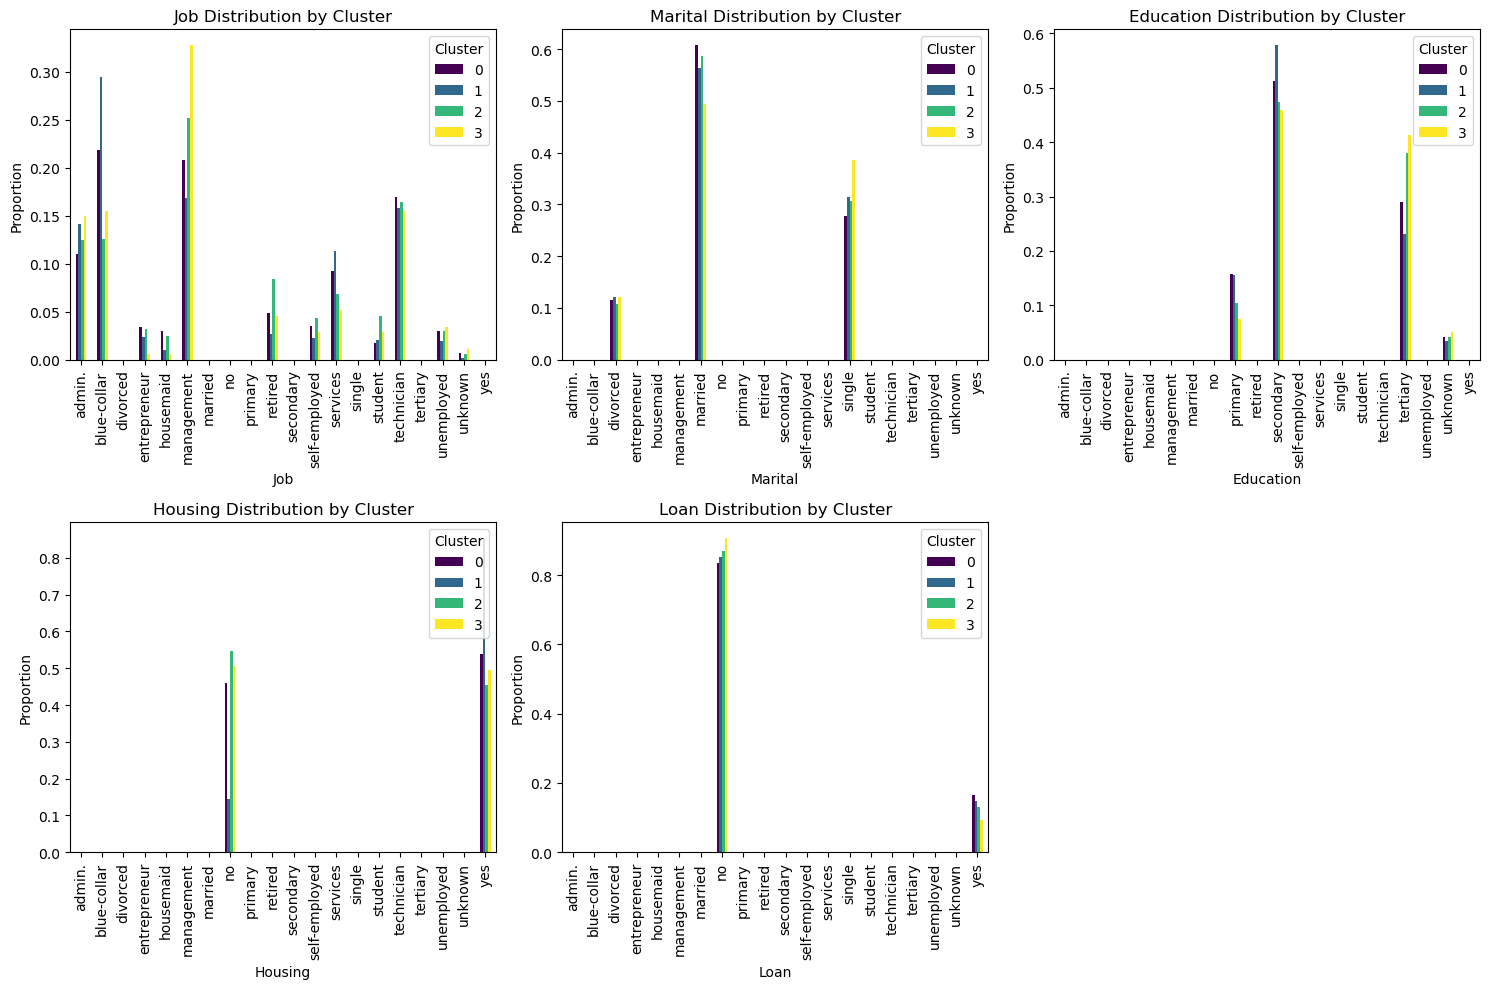


Numeric Feature Summary by Cluster (Balanced K-Means):


Cluster        age                        balance                      \
                mean median        std         mean median          std   
0       0  40.943959   39.0  10.455571  1320.549233  415.0  3039.793457   
1       1  39.185792   37.0   9.428124  1053.062698  405.0  2534.074320   
2       2  42.301554   39.0  12.568032  1959.921610  883.0  3338.105204   
3       3  40.919540   37.5  10.912917  1897.143678  792.5  3985.133033   

     duration                     campaign                        pdays  \
         mean median         std      mean median       std        mean   
0  257.759595  177.0  262.198443  2.912629    2.0  3.315033   -0.695621   
1  250.357204  186.0  236.359206  2.178602    2.0  1.662911  321.490078   
2  268.096987  199.5  232.756729  1.978814    1.0  1.467656  147.331685   
3  258.143678  222.5  220.158369  1.718391    1.0  1.319487  572.718391   

                      previous                   
  median         std      mean median       std  
0   -1.0    3.903496  0.031813    0.0  0.463894  
1  333.0   43.802882  3.077941    2.0  5.838887  
2  160.0   43.033025  3.233522    2.0  3.194590  
3  527.0  121.356285  3.517241    2.0  5.729675


Categorical Feature Summary by Cluster (Balanced K-Means):


,job,marital,education,housing,loan
Cluster,,,,,
0,blue-collar (21.8%),married (60.8%),secondary (51.2%),yes (54.0%),no (83.5%)
1,blue-collar (29.5%),married (56.4%),secondary (57.8%),yes (85.5%),no (85.2%)
2,management (25.2%),married (58.6%),secondary (47.3%),no (54.6%),no (86.9%)
3,management (32.8%),married (49.4%),secondary (46.0%),no (50.6%),no (90.8%)



Cluster Insights (Balanced K-Means):

Cluster Cluster 0:
  Numeric Summary:
Cluster       age                      balance                      duration                   campaign                     pdays                 previous                
             mean median       std        mean median         std       mean median        std     mean median      std      mean median      std     mean median      std
      0 40.943959   39.0 10.455571 1320.549233  415.0 3039.793457 257.759595  177.0 262.198443 2.912629    2.0 3.315033 -0.695621   -1.0 3.903496 0.031813    0.0 0.463894

  Categorical Trends:
blue-collar (21.8%)
    married (60.8%)
  secondary (51.2%)
        yes (54.0%)
         no (83.5%)

Cluster Cluster 1:
  Numeric Summary:
Cluster       age                     balance                     duration                   campaign                      pdays                  previous                
             mean median      std        mean median        std       mean me

In [21]:
# --- Append Balanced K-Means Clustering Labels --- #
data["Cluster"] = pd.Series(kmeans_labels, index=data.index)  

# --- Analyze Clusters with Numeric and Categorical Features --- #
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'housing', 'loan']

# Numeric feature analysis (mean, median, and standard deviation for better insights)
cluster_summary_numeric = data.groupby('Cluster')[numeric_features].agg(['mean', 'median', 'std']).reset_index()

# Categorical feature analysis (mode and proportion of dominant category)
def mode_with_proportion(series):
    mode_value = series.mode()[0]
    proportion = (series == mode_value).mean()
    return f"{mode_value} ({proportion:.1%})"

cluster_summary_categorical = data.groupby('Cluster')[categorical_features].agg(mode_with_proportion)

# --- Visualize Numeric Features by Cluster (Mean and Variability) --- #
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features) // 2 + len(numeric_features) % 2, 2, i)  # Dynamically adjust rows based on the number of features
    sns.barplot(x='Cluster', y=feature, data= data, palette="coolwarm", ci="sd")
    plt.title(f'Mean and Variability of {feature.capitalize()} by Cluster')
    plt.xlabel("Cluster")
    plt.ylabel(f"{feature.capitalize()}")
plt.tight_layout()
plt.show()

# --- Visualize Feature Importance for Random Forest --- #
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest (example using processed data)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importance and visualize
feature_importance = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

# --- Map PCA Components to Original Features --- #
# Ensure the correct number of features matches between PCA components and encoded_data
if pca.components_.shape[1] == len(encoded_data.columns) - 1:  # If PCA excludes the target column ('y_yes')
    original_features = encoded_data.columns[:-1]
else:
    original_features = encoded_data.columns[:pca.components_.shape[1]]  # Match PCA input feature count

# Check alignment and log shapes for debugging
print(f"PCA Components Shape: {pca.components_.shape}")
print(f"Original Features Shape: {len(original_features)}")

# Create a DataFrame for PCA components
try:
    pca_components = pd.DataFrame(pca.components_, columns=original_features, index=['PC1', 'PC2'])
except ValueError as e:
    print(f"Error creating PCA components DataFrame: {e}")
    raise ValueError(f"Ensure that PCA components and original features are aligned. PCA shape: {pca.components_.shape}, Feature shape: {len(original_features)}")

# Visualize contributions of original features to PCA components
for pc in pca_components.index:
    plt.figure(figsize=(12, 6))
    pca_components.loc[pc].sort_values(ascending=False).plot(kind='bar', color='purple', alpha=0.7)
    plt.title(f"Feature Contributions to {pc}")
    plt.ylabel("Contribution")
    plt.xlabel("Original Features")
    plt.tight_layout()
    plt.show()

# --- Visualize Categorical Feature Proportions by Cluster --- #
cluster_categorical_distribution = data.groupby('Cluster')[categorical_features].apply(
    lambda x: x.apply(lambda col: col.value_counts(normalize=True))
)

# Dynamically determine grid layout
n_categorical = len(categorical_features)
rows = n_categorical // 3 + (n_categorical % 3 > 0)
cols = min(3, n_categorical)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axes = axes.flatten() if n_categorical > 1 else [axes]  # Flatten axes for easy iteration if grid > 1 plot

for i, feature in enumerate(categorical_features):
    feature_distribution = cluster_categorical_distribution[feature].unstack(level=0)
    feature_distribution.plot(kind='bar', ax=axes[i], colormap='viridis')
    axes[i].set_title(f"{feature.capitalize()} Distribution by Cluster")
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel("Proportion")
    axes[i].legend(title="Cluster", loc='upper right')

# Turn off any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# --- Display Summaries for Clusters --- #
print("\nNumeric Feature Summary by Cluster (Balanced K-Means):")
display(cluster_summary_numeric)

print("\nCategorical Feature Summary by Cluster (Balanced K-Means):")
display(cluster_summary_categorical)

# --- Generate Insights from Balanced K-Means Cluster Analysis --- #
cluster_insights = {}
for cluster in cluster_summary_numeric['Cluster']:
    numeric_summary = cluster_summary_numeric[cluster_summary_numeric['Cluster'] == cluster]
    categorical_trends = cluster_summary_categorical.loc[cluster]
    insights = {
        "Numeric Summary": numeric_summary,
        "Categorical Trends": categorical_trends
    }
    cluster_insights[f"Cluster {cluster}"] = insights

print("\nCluster Insights (Balanced K-Means):")
for cluster, insights in cluster_insights.items():
    print(f"\nCluster {cluster}:")
    print("  Numeric Summary:")
    print(insights["Numeric Summary"].to_string(index=False))
    print("\n  Categorical Trends:")
    print(insights["Categorical Trends"].to_string(index=False))


# Results & Analysis 

The analysis utilized a combination of supervised and unsupervised learning techniques to deeply explore customer behavior and predict subscription outcomes. This dual approach provided complementary insights into the data, revealing critical patterns and actionable conclusions.

Supervised Learning Models

Logistic Regression was chosen as a baseline due to its simplicity and speed, achieving an accuracy of 88.17% with the shortest training time of 0.02 seconds. While this makes Logistic Regression a strong candidate for real-time decision-making scenarios, its slightly higher misclassification rate compared to more advanced models such as Random Forest limits its applicability in cases requiring highly precise predictions. Despite this, its interpretability and efficiency make it a robust baseline for comparison. Random Forest, a more complex tree-based model, excelled in handling the mixed feature types present in the dataset. It achieved an accuracy of 87.47% with a ROC-AUC score of 0.98, demonstrating its ability to distinguish between customers likely to subscribe and those who are not. The training time of 3.91 seconds was reasonable given the model's improved performance and feature importance insights. Random Forest highlighted call duration, campaign frequency, and previous campaign success as the most influential predictors of subscription outcomes. This valuable information provides clear guidance for focusing future marketing efforts on these key areas. Feature importance analysis through Random Forest was complemented by PCA (Principal Component Analysis), which identified significant contributions of original features to the key principal components (PC1 and PC2). Features such as balance, pdays, and previous campaign success were highly influential in driving variability in the dataset, further validating their role as key predictors.

Unsupervised Learning Models

K-Means Clustering, achieving a silhouette score of 0.9166, effectively segmented customers into four distinct groups:
- Cluster 0: Customers with shorter call durations, higher campaign frequencies, and moderate balances. These individuals had the lowest subscription likelihood, suggesting a need for alternative engagement strategies.
- Cluster 1: A younger demographic of primarily blue-collar workers with low balances and moderate engagement levels. Slightly more responsive than Cluster 0, this group could benefit from tailored messaging to improve subscription likelihood.
- Cluster 2: Older, financially well-off customers in managerial roles with the highest balances, longest call durations, and a strong history of successful campaign outcomes. This segment represented the most likely subscribers and should be prioritized for focused marketing efforts.
- Cluster 3: A diverse group with intermediate balances and responsiveness. Customers in this cluster exhibited varied behaviors, making them suitable for a mix of personalized and general engagement strategies.
Hierarchical Clustering provided additional depth by revealing nested subgroups within these broader clusters, achieving a silhouette score of 0.9074. This allowed for finer-grained segmentation, which can be leveraged for highly customized marketing strategies. Meanwhile, DBSCAN, with a silhouette score of 0.4698, identified niche segments and outliers, such as high-balance customers exhibiting atypical subscription behaviors. These outliers present unique opportunities for personalized marketing interventions.

Key Insights

The analysis reinforced the critical importance of call duration as the strongest predictor of subscription likelihood, with longer call durations consistently associated with higher subscription rates. Balance emerged as another key differentiator, with customers holding higher balances (e.g., those in Cluster 2) demonstrating the greatest potential for subscription.
Campaign frequency, while positively correlated with engagement in some clusters, revealed diminishing returns when excessive, emphasizing the need for balanced outreach strategies.

Categorical Feature Insights:

- Occupation: Blue-collar workers dominated Clusters 0 and 1, while managerial roles were more prevalent in Cluster 2.
- Marital Status: Married individuals represented the majority across all clusters, though proportions varied slightly.
- Housing Loan: Ownership was notably lower in Cluster 2, suggesting greater financial flexibility within this group.

# Discusion and Conclusion

This project provided valuable insights into customer behavior within the bank marketing dataset by employing a combination of supervised and unsupervised learning techniques. The integration of these approaches proved highly effective, with supervised models offering accurate predictions and identifying key drivers of subscription likelihood, such as call duration and account balance. Random Forest, in particular, highlighted these variables as critical predictors, underscoring the importance of meaningful customer interactions and targeting high-value individuals for marketing success. Meanwhile, unsupervised learning techniques, such as K-Means, successfully segmented customers into four distinct clusters, each with unique profiles. Cluster 0 represented customers with shorter call durations and higher campaign frequencies but moderate balances, who had the lowest subscription likelihood and required alternative strategies to improve engagement. Cluster 1 consisted of younger, primarily blue-collar customers with lower balances and moderate engagement, slightly more responsive than Cluster 0 and likely to benefit from tailored, incentive-driven marketing. Cluster 2, comprising older managerial customers with higher balances, longer call durations, and successful campaign histories, emerged as the most promising segment for immediate marketing efforts. Cluster 3 included a diverse group with intermediate balances and engagement, exhibiting varied behaviors that make them suitable for personalized outreach based on additional insights.

Despite these achievements, the analysis faced challenges. DBSCAN struggled to handle the high-dimensional and variable-density nature of the dataset, resulting in clustering results that were less interpretable compared to K-Means. Additionally, dimensionality reduction through PCA, while effective in reducing complexity, required careful alignment with the dataset's encoded features, introducing some preprocessing complexity. Furthermore, the trade-off between campaign frequency and engagement highlighted the need to mitigate customer fatigue, particularly in less engaged clusters like Clusters 0 and 1, while maintaining responsiveness.

To enhance future analyses, several strategies could be explored. Advanced clustering methods, such as hybrid techniques combining K-Means with DBSCAN or soft clustering algorithms, could improve segmentation precision by addressing overlapping behaviors. Alternative dimensionality reduction methods like t-SNE or UMAP might better separate clusters and improve interpretability in high-dimensional spaces. Including additional customer-specific features, such as geographic or psychographic data, could enrich segmentation and yield deeper insights. Finally, dynamic analysis of customer behavior over time, particularly across multiple campaigns, could provide actionable strategies for sustaining engagement and improving long-term marketing effectiveness.

In conclusion, the project demonstrated the power of combining supervised and unsupervised learning techniques for customer behavior analysis and marketing strategy optimization. While supervised models provided actionable insights into feature importance, unsupervised approaches offered meaningful segmentation across four distinct clusters. By addressing the identified challenges and exploring advanced methodologies, future analyses can achieve even greater precision and personalization. This comprehensive framework lays a strong foundation for designing data-driven marketing campaigns that maximize customer engagement and subscription rates.